<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 4: *Classification And Regression Tree (CART)***

###**Tenggat Waktu: 10 Maret 2024, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab4_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **12 Maret 2024, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [2]:
# Isi dengan data diri Anda
NAMA = "Sri Saraswati Widhisari"
KELAS = "B"
NPM = "2206812180"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [3]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Sri Saraswati Widhisari dari kelas B dengan NPM 2206812180, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Sri Saraswati Widhisari)


## Deskripsi Dataset

Lab ini akan menggunakan 2 dataset, yakni dataset untuk klasifikasi dan dataset untuk regresi.

Dataset yang digunakan untuk klasifikasi adalah dataset **Obesity or CVD risk** (https://kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/data) dengan modifikasi.

Dataset yang akan digunakan untuk regresi adalah dataset **Student Performance** (https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data) dengan modifikasi.

### Deskripsi Dataset Klasifikasi

Dataset ini terdiri atas atribut-atribut yang dirasa berpengaruh terhadap tingkat obesitas pada orang-orang dari negara Meksiko, Peru, dan Kolombia, dengan rentang usia 14 hingga 61 tahun.

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:


*   **Gender**: Jenis Kelamin.
*   **Age**: Umur.
*   **Height**: Tinggi Badan.
*   **Weight**: Berat Badan.
*   **family_history_with_overweight**: Atribut biner (yes atau no) yang menyatakan apakah ada anggota keluarga yang menderita kelebihan berat badan.
*   **FAVC**: Atribut biner (yes atau no) yang menyatakan apakah orang tersebut sering mengonsumsi makanan berkalori tinggi.
*   **FCVC**: Frekuensi seseorang mengonsumsi sayur-sayuran.
*   **NCP**: Jumlah makan utama seseorang (main meals).
*   **CAEC**: Konsumsi makanan di antara waktu makan (Consumption of food between meals).
*   **SMOKE**: Atribut biner (yes atau no) yang menyatakan apakah seseorang merokok atau tidak.
*   **CH2O**: Konsumsi air setiap hari.
*   **SCC**: Atribut biner (yes atau no) yang menyatakan apakah seseorang melakukan pemantauan konsumsi kalori.
*   **FAF**: Frekuensi aktivitas fisik.
*   **TUE**: Waktu menggunakan perangkat teknologi.
*   **CALC**: Konsumsi alkohol.
*   **MTRANS**: Transportasi yang digunakan.

Dengan target variabel:
*   **ObesityLevel**: Level obesitas seseorang. Nilai dari target variabel ini terdiri atas:

  * *Underweight*
  * *Normal*
  * *Overweight I*
  * *Overweight II*
  * *Obesity I*
  * *Obesity II*
  * *Obesity III*

### Deskripsi Dataset Regresi

Dataset ini berisi informasi atribut-atribut yang akan digunakan untuk menguji faktor-faktor yang mempengaruhi performa akademik pelajar.

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:


*   **Hours Studied**: Jumlah total jam yang dihabiskan tiap siswa untuk belajar.
*   **Previous Score**: Skor yang diperoleh siswa pada tes sebelumnya.
*   **Extracurricular Activities**: Atribut  yang menyatakan apakah siswa berpartisipasi dalam kegiatan esktrakulikuler (Ya atau Tidak).
*   **Sleep Hours**: Jumlah rata-rata jam tidur siswa per hari.
*   **Sample Question Papers Practiced**: Jumlah contoh soal yang telah dikerjakan oleh siswa tersebut.

Dengan target variable:
*   **Performance Index**: Ukuran kinerja untuk keseluruhan performa siswa. Nilainya berkisar antara 10 hingga 100, dengan nilai yang lebih tinggi menunjukkan kinerja yang lebih baik.

## Import Libraries

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns

## Read Datasets

**Bacalah konten dari masing-masing dataset yang telah disediakan. Perhatikan tipe data dari masing-masing kolom, apakah sudah cocok untuk dijadikan input ke dalam model atau tidak.**

### Dataset Obesity Risk

**Terapkan proses Read Dataset di bawah cell ini**

In [5]:
obesity_df = pd.read_csv("obesity_risk.csv")
obesity_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS,ObesityLevel
0,OBX0968,Male,24,1.700000,85.000000,yes,yes,2,3,Frequently,no,3.000000,0,1,Frequently,Public_Transportation,Overweight_Level_II
1,OBX0848,Female,21,1.486484,60.117993,yes,no,2,1,Sometimes,no,1.000000,0,0,no,Public_Transportation,Overweight_Level_II
2,OBX01416,Female,26,1.618867,110.777391,yes,yes,3,3,Sometimes,no,2.618198,0,0,Sometimes,Public_Transportation,Obesity_Type_III
3,OBX0761,Female,23,1.644161,84.340406,yes,yes,2,3,Sometimes,no,2.715572,2,0,no,Public_Transportation,Obesity_Type_I
4,OBX0604,Female,25,1.628470,107.218949,yes,yes,3,3,Sometimes,no,2.487070,0,0,Sometimes,Public_Transportation,Obesity_Type_III


### Dataset Student Performance

**Terapkan proses Read Dataset di bawah cell ini**

In [6]:
student_performance_df = pd.read_csv("student_performance.csv")
student_performance_df.head()

,id,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,SP3194,1,75,Yes,9,5,50.0
1,SP3624,5,54,Yes,5,1,36.0
2,SP3631,3,51,No,7,6,34.0
3,SP2891,8,81,No,4,1,74.0
4,SP5757,9,58,No,8,7,59.0


## SOAL 1 Data Pre-processing [20]

**Terapkan proses data pre-processing di bawah cell ini**

### Dataset Obesity Risk

Shape Data

**Terapkanlah proses data pre-processing pada bagian ini agar dataset yang telah diberikan dapat dijadikan input dari model yang akan kalian buat. Terapkan proses tersebut untuk masing-masing dataset (Obesity Risk & Student Performance). Pastikan dataset hingga benar-benar bisa langsung diproses oleh model dan jangan lupa pula untuk membaginya menjadi train dan test**

In [7]:
obesity_df.shape

(1055, 17)

Unique Value dari Data

In [8]:
obesity_df.nunique()

id                                1055
Gender                               2
Age                                 33
Height                             821
Weight                             790
family_history_with_overweight       2
FAVC                                 2
FCVC                                 3
NCP                                  4
CAEC                                 4
SMOKE                                2
CH2O                               656
FAF                                  4
TUE                                  3
CALC                                 3
MTRANS                               5
ObesityLevel                         7
dtype: int64

In [9]:
obesity_df.FAF.unique()

array([0, 2, 1, 3], dtype=int64)

In [10]:
obesity_df.TUE.unique()

array([1, 0, 2], dtype=int64)

In [11]:
obesity_df.FCVC.unique()

array([2, 3, 1], dtype=int64)

In [12]:
obesity_df.NCP.unique()

array([3, 1, 2, 4], dtype=int64)

Cek Tipe Data

In [13]:
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1055 non-null   object 
 1   Gender                          1055 non-null   object 
 2   Age                             1055 non-null   int64  
 3   Height                          1055 non-null   float64
 4   Weight                          1055 non-null   float64
 5   family_history_with_overweight  1055 non-null   object 
 6   FAVC                            1055 non-null   object 
 7   FCVC                            1055 non-null   int64  
 8   NCP                             1055 non-null   int64  
 9   CAEC                            1055 non-null   object 
 10  SMOKE                           1055 non-null   object 
 11  CH2O                            1055 non-null   float64
 12  FAF                             10

In [14]:
#FCVC dan NCP seharusnya jadi object(?)
# FAF dan TUE seharusnya jadi object(?)
# FAF -> Frequent consumption of high caloric food
# TUE -> Time using technology devices
# FCVC -> Frequency of consumption of vegetables
# NCP -> Number of main meals
#ini bisa pakai label aja -> karena ini kategorikal yang memang angkanya 1 dan 2 memang memilki arti 



In [15]:
obesity_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,23.880569,1.701977,86.632155,2.218957,2.522275,2.013240,0.743128,0.368720
std,6.087826,0.092295,26.367803,0.610177,0.829500,0.614805,0.838692,0.577543
min,14.000000,1.481682,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.000000,1.629466,66.000000,2.000000,2.000000,1.548393,0.000000,0.000000
50%,22.000000,1.700627,83.014033,2.000000,3.000000,2.000000,1.000000,0.000000
75%,26.000000,1.769081,107.298825,3.000000,3.000000,2.504052,1.000000,1.000000
max,55.000000,1.931263,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Cek distribusi plot

In [16]:
obesity_df.skew()
#ini unutk melihat pattern data dan melihat bagaimana distribusi data
#dan untuk mengisi data yang missing value

C:\Users\ACER\AppData\Local\Temp\ipykernel_15528\1578794692.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  obesity_df.skew()


Age       1.402617
Height   -0.001215
Weight    0.263184
FCVC     -0.158352
NCP      -0.875365
CH2O     -0.091407
FAF       0.851099
TUE       1.308706
dtype: float64

Cek missing value

In [17]:
# code here
obesity_df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
ObesityLevel                      0
dtype: int64

CEK DUPLICATES

In [18]:
obesity_df.duplicated().sum()
#tidak ada duplicate

0

Cek Apakah Imbalance Class (Target: Obesity Level)

In [19]:
obesity_df.ObesityLevel.value_counts()
#sejauh ini tiap kuantitas dari setiap kategori obesity level sudah balance

Obesity_Type_I         175
Obesity_Type_III       162
Obesity_Type_II        148
Overweight_Level_II    145
Overweight_Level_I     145
Normal_Weight          144
Insufficient_Weight    136
Name: ObesityLevel, dtype: int64

<!-- UBAH DATATYPE KEEMPAT FITUR KE KATEGORIKAL -->

In [20]:
# obesity_df['FAF'] = obesity_df['FAF'].astype('object')
# obesity_df['TUE'] = obesity_df['TUE'].astype('object')
# obesity_df['FCVC'] = obesity_df['FCVC'].astype('object')
# obesity_df['NCP'] = obesity_df['NCP'].astype('object')
#sudah berubah jadi object 

Daftar Insight (Data Analysis)

DISTRIBUTION 

OUTLIERS

LABEL ENCODING UNTUK KATEGORIKAL

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Membuat list kolom kategorikal, kecuali 'ObesityLevel'
obesity_df2 = obesity_df.copy() 
categorical_cols = [col for col in obesity_df.select_dtypes(include=['object', 'category']).columns if col != 'ObesityLevel']

# Inisialisasi objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding pada setiap kolom kategorikal
for col in categorical_cols:
    obesity_df[col] = label_encoder.fit_transform(obesity_df[col])

# Cetak data setelah encoding
print(obesity_df.head())

     id  Gender  Age    Height      Weight  family_history_with_overweight  \
0  1040       1   24  1.700000   85.000000                               1   
1   973       0   21  1.486484   60.117993                               1   
2   250       0   26  1.618867  110.777391                               1   
3   925       0   23  1.644161   84.340406                               1   
4   835       0   25  1.628470  107.218949                               1   

   FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  FAF  TUE  CALC  MTRANS  \
0     1     2    3     1      0  3.000000    0    1     0       3   
1     0     2    1     2      0  1.000000    0    0     2       3   
2     1     3    3     2      0  2.618198    0    0     1       3   
3     1     2    3     2      0  2.715572    2    0     2       3   
4     1     3    3     2      0  2.487070    0    0     1       3   

          ObesityLevel  
0  Overweight_Level_II  
1  Overweight_Level_II  
2     Obesity_Type_III  
3       Obesity_

In [22]:
obesity_df
#harusnya aman aja 

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS,ObesityLevel
0,1040,1,24,1.700000,85.000000,1,1,2,3,1,0,3.000000,0,1,0,3,Overweight_Level_II
1,973,0,21,1.486484,60.117993,1,0,2,1,2,0,1.000000,0,0,2,3,Overweight_Level_II
2,250,0,26,1.618867,110.777391,1,1,3,3,2,0,2.618198,0,0,1,3,Obesity_Type_III
3,925,0,23,1.644161,84.340406,1,1,2,3,2,0,2.715572,2,0,2,3,Obesity_Type_I
4,835,0,25,1.628470,107.218949,1,1,3,3,2,0,2.487070,0,0,1,3,Obesity_Type_III
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,415,0,18,1.692242,90.019501,1,1,2,3,2,0,1.904054,1,0,1,3,Obesity_Type_I
1051,977,0,25,1.640741,104.808542,1,1,3,3,2,0,2.653531,0,0,1,3,Obesity_Type_III
1052,595,0,25,1.662978,110.930509,1,1,3,3,2,0,1.679489,0,0,1,3,Obesity_Type_III
1053,407,0,20,1.738717,128.114161,1,1,3,3,2,0,1.797041,1,0,1,3,Obesity_Type_III


In [23]:
# obesity_df2

*TIDAK MEMERLUKAN SCALE UNTUK DECISON TREE

*OUTLIERS -> tetapi decision tree tidak sensitif terhadap outilers karena dia parititioning patterns

SPLIT DATA TRAINING DAN TEST

In [24]:
#drop id
obesity_df.drop(columns='id', inplace=True)
X_train_obes, X_test_obes, y_train_obes, y_test_obes = train_test_split( obesity_df.drop(columns='ObesityLevel'), obesity_df['ObesityLevel'], test_size=0.2, random_state=0)

In [25]:
X_train_obes

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS
384,0,37,1.567915,76.129784,1,1,2,3,2,0,2.102976,0,0,1,0
737,0,19,1.520862,42.000000,0,1,3,1,1,0,1.848703,0,0,1,3
929,1,17,1.790000,57.000000,1,1,2,4,1,0,2.000000,2,1,2,3
255,1,17,1.700000,83.414072,1,0,2,2,2,0,1.909253,1,0,1,3
367,1,30,1.760000,112.000000,1,1,1,3,3,1,2.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1,37,1.762921,118.401740,1,1,2,2,2,0,1.885926,0,0,1,0
763,0,22,1.560000,49.000000,0,1,2,3,2,0,1.000000,2,0,2,4
835,1,17,1.896734,59.895052,1,1,2,3,2,0,2.000000,2,0,2,0
559,0,21,1.708291,130.986338,1,1,3,3,2,0,1.205548,1,0,1,3


In [26]:
X_test_obes

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS
253,0,24,1.737313,133.166595,1,1,3,3,2,0,2.846259,1,0,1,3
75,0,25,1.685482,113.451224,1,1,3,3,2,0,2.987718,0,0,1,3
679,0,19,1.756865,49.699672,0,1,1,3,2,0,1.095417,2,1,1,3
240,1,22,1.716289,75.688433,1,1,2,3,2,0,2.000000,0,1,1,3
331,0,21,1.592379,44.009450,0,0,3,1,1,0,2.566629,1,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0,25,1.629491,104.839068,1,1,3,3,2,0,2.209790,0,0,1,3
267,0,25,1.686033,104.772164,1,1,3,3,2,0,1.299194,0,0,1,3
925,0,26,1.629191,104.826776,1,1,3,3,2,0,2.654702,0,0,1,3
531,0,24,1.599697,64.808022,0,1,2,3,2,0,1.549931,0,0,1,3


In [27]:
y_test_obes

253        Obesity_Type_III
75         Obesity_Type_III
679     Insufficient_Weight
240      Overweight_Level_I
331     Insufficient_Weight
               ...         
1020       Obesity_Type_III
267        Obesity_Type_III
925        Obesity_Type_III
531      Overweight_Level_I
738     Overweight_Level_II
Name: ObesityLevel, Length: 211, dtype: object

In [28]:
y_train_obes

384          Obesity_Type_I
737     Insufficient_Weight
929     Insufficient_Weight
255     Overweight_Level_II
367         Obesity_Type_II
               ...         
1033        Obesity_Type_II
763           Normal_Weight
835     Insufficient_Weight
559        Obesity_Type_III
684           Normal_Weight
Name: ObesityLevel, Length: 844, dtype: object

### Dataset Student Performance

**Terapkan proses data pre-processing di bawah cell ini**

In [29]:
student_performance_df.shape

(6000, 7)

In [30]:
# code here
student_performance_df

,id,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,SP3194,1,75,Yes,9,5,50.0
1,SP3624,5,54,Yes,5,1,36.0
2,SP3631,3,51,No,7,6,34.0
3,SP2891,8,81,No,4,1,74.0
4,SP5757,9,58,No,8,7,59.0
...,...,...,...,...,...,...,...
5995,SP9285,3,68,Yes,9,6,49.0
5996,SP6591,2,76,Yes,6,1,54.0
5997,SP5721,5,78,Yes,5,9,64.0
5998,SP2706,1,92,Yes,6,9,66.0


CEK DUPLIKAT

In [31]:
student_performance_df.duplicated().sum()

0

In [32]:
student_performance_df.nunique()

id                                  6000
Hours Studied                          9
Previous Scores                       60
Extracurricular Activities             2
Sleep Hours                            6
Sample Question Papers Practiced      10
Performance Index                     90
dtype: int64

CEK MISSING VALUE

In [33]:
student_performance_df.isna().sum()

id                                  0
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

CEK DISTIRBUSI DATA 

In [34]:
student_performance_df.info()
#tipe data harusnya aman 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                6000 non-null   object 
 1   Hours Studied                     6000 non-null   int64  
 2   Previous Scores                   6000 non-null   int64  
 3   Extracurricular Activities        6000 non-null   object 
 4   Sleep Hours                       6000 non-null   int64  
 5   Sample Question Papers Practiced  6000 non-null   int64  
 6   Performance Index                 6000 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 328.2+ KB


In [35]:
student_performance_df.describe()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,5.015667,69.601333,6.527833,4.567167,55.425667
std,2.586994,17.384498,1.697068,2.875274,19.280243
min,1.000000,40.000000,4.000000,0.000000,11.000000
25%,3.000000,55.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,56.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [36]:
student_performance_df.skew()

C:\Users\ACER\AppData\Local\Temp\ipykernel_15528\185085080.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  student_performance_df.skew()


Hours Studied                      -0.009236
Previous Scores                    -0.000572
Sleep Hours                        -0.031935
Sample Question Papers Practiced   -0.032476
Performance Index                  -0.011751
dtype: float64

In [37]:
#drop id 
student_performance_df2 = student_performance_df.copy()
student_performance_df.drop(columns='id', inplace=True)

In [38]:
#doing label encoding untuk attibut extracurricular activities
student_performance_df['Extracurricular Activities'] = label_encoder.fit_transform(student_performance_df['Extracurricular Activities'])

In [39]:
student_performance_df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,1,75,1,9,5,50.0
1,5,54,1,5,1,36.0
2,3,51,0,7,6,34.0
3,8,81,0,4,1,74.0
4,9,58,0,8,7,59.0
...,...,...,...,...,...,...
5995,3,68,1,9,6,49.0
5996,2,76,1,6,1,54.0
5997,5,78,1,5,9,64.0
5998,1,92,1,6,9,66.0


CEK OUTLIERS - WALAUPUN DECISION TREE DAN RANDOM FOREST TIDAK BERPENGARUH PADA OUTLIERS

MELAKUKAN SPLIT DATA TRAIN DAN TEST -> 80 : 20 

In [40]:
X_train_perform, X_test_perform, y_train_perform, y_test_perform = train_test_split( student_performance_df.drop(columns='Performance Index'), student_performance_df['Performance Index'], test_size=0.2, random_state=0)

In [41]:
y_train_perform

3381    87.0
31      41.0
1596    43.0
1386    63.0
4237    78.0
        ... 
4931    59.0
3264    60.0
1653    47.0
2607    46.0
2732    29.0
Name: Performance Index, Length: 4800, dtype: float64

## CART (Classification and Regression Tree)

### Decision Tree

Decision Tree merupakan model yang beroperasi dengan struktur berbentuk Binary Tree, di mana setiap node hanya dapat memiliki dua child node paling banyak. Dalam bidang data science, model ini diterapkan dalam konteks Supervised Learning, yaitu model dibentuk berdasarkan data training dan selanjutnya digunakan untuk membuat prediksi terhadap data yang disajikan. Data training yang digunakan akan diolah menjadi sebuah rangkaian aturan dalam bentuk Binary Tree. Aturan-aturan ini selanjutnya digunakan untuk proses prediksi pada dataset lain.

#### Training

Function di bawah ini merupakan function yang dapat digunakan untuk menghitung metrics hasil testing, baik untuk kasus regresi, maupun kasus klasifikasi.

In [42]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [43]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score

def classification_metrics(prediction, y_test):
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print(f'Accuracy: {accuracy_score(y_test, prediction)}')
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

##### Dataset Obesity Risk

In [44]:
# Melakukan training pada model decision tree
# Sesuaikan nama variable X_train dan y_train kamu
dtc_obes = DecisionTreeClassifier(max_depth=3, random_state=42)

###### Cross Validation

Kemudian kita akan melakukan cross validation dengan number_split = 5. Cross Validation digunakan untuk membagi dataset menjadi beberapa bagian (*fold*). Strategi ini dapat Anda gunakan untuk dapat menghasilkan model yang lebih stabil performance-nya serta dapat juga digunakan untuk menghindari overfitting data.

In [45]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [46]:
# Variabel dapat disesuaikan oleh masing-masing mahasiswa. Di preprocessing tahap akhir ekspektasinya mahasiswa buat train test split

scores = cross_val_score(dtc_obes, X_train_obes, y_train_obes, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation:{scores.mean()}')

Hasil Evaluasi cross validation:0.6611510284587208


In [47]:
dtc_obes.fit(X_train_obes, y_train_obes)


DecisionTreeClassifier(max_depth=3, random_state=42)

##### Dataset Student Performance

###### Cross Validation

In [48]:
# Melakukan training pada model decision tree
# Sesuaikan nama variable X_train dan y_train kamu
dtr_perform = DecisionTreeRegressor(max_depth=3, random_state=42)

In [49]:
# Variabel dapat disesuaikan oleh masing-masing mahasiswa. Di preprocessing tahap akhir ekspektasinya mahasiswa membuat train test split dengan variabel tersebut

scores2 = cross_val_score(dtr_perform, X_train_perform, y_train_perform, scoring='r2', cv=kfold)
print(f'Hasil Evaluasi cross validation:{scores2.mean()}')

Hasil Evaluasi cross validation:0.892027172875701


In [50]:
dtr_perform.fit(X_train_perform, y_train_perform)


DecisionTreeRegressor(max_depth=3, random_state=42)

#### Evaluation

##### Dataset Obesity Risk

In [51]:
# Predict testing data
prediction = dtc_obes.predict(X_test_obes)

# Eval the prediction
classification_metrics(prediction, y_test_obes)

Hasil Evaluasi berdasarkan classification report 

                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.64      0.74        25
      Normal_Weight       0.50      0.34      0.41        29
     Obesity_Type_I       0.71      0.27      0.39        37
    Obesity_Type_II       0.95      0.80      0.87        25
   Obesity_Type_III       1.00      1.00      1.00        31
 Overweight_Level_I       0.55      0.71      0.62        34
Overweight_Level_II       0.41      0.87      0.56        30

           accuracy                           0.65       211
          macro avg       0.72      0.66      0.66       211
       weighted avg       0.71      0.65      0.64       211



Confusion Matrix



prediction,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
actual,,,,,,,
Insufficient_Weight,16,8,0,0,0,1,0
Normal_Weight,2,10,0,0,0,17,0
Obesity_Type_I,0,0,10,1,0,0,26
Obesity_Type_II,0,0,3,20,0,0,2
Obesity_Type_III,0,0,0,0,31,0,0
Overweight_Level_I,0,1,0,0,0,24,9
Overweight_Level_II,0,1,1,0,0,2,26




Accuracy: 0.6492890995260664
F1 Macro Average: 0.6555136846121433
F1 Micro Average: 0.6492890995260664
Precision Macro Average: 0.7162440733869305
Precision Micro Average: 0.6492890995260664
Recall Macro Average: 0.6610924108692872
Recall Micro Average: 0.6492890995260664



##### Dataset Admission Prediction

In [52]:
# Predict testing data
prediction = dtr_perform.predict(X_test_perform)

# Eval the prediction
regression_metrics(prediction, y_test_perform)

MAE: 5.08832321327578
MSE: 39.78832943878528
RMSE: 6.30779909626054
R_squared: 0.8932081787912076


#### Hyperparameter


Hyperparameter adalah parameter yang dapat kita sesuaikan atau konfigurasi sebelum memulai proses pembangunan model. Tujuan dari penyesuaian ini adalah untuk mengoptimalisasi performa model sehingga diharapkan dapat berfungsi lebih efektif.

> Ada beberapa jenis hyperparameter yang terdapat dalam beragam algoritma machine learning, termasuk dalam algoritma Decision Tree. Beberapa hyperparameter yang ada dalam algoritma Decision Tree yang disediakan oleh modul sklearn.tree antara lain:

- `criterion`: Metrik yang digunakan untuk mengevaluasi kualitas pemisahan node, contohnya:
- `squared_error`: menggunakan reduksi varians sebagai kriteria seleksi fitur dan meminimalkan kerugian L2 dengan menggunakan mean dari setiap node terminal
- `friedman_mse`: menghitung mean squared error dengan Friedman's improvement score untuk kemungkinan pemisahan (tidak perlu khawatir, ini tidak akan keluar di ujian)
- `absolute_error`: meminimalkan kerugian L1 dengan menggunakan median dari setiap node terminal
- `poisson`: memanfaatkan reduksi dalam Poisson deviance untuk menentukan pemisahan
- `max_depth`: Membatasi kedalaman maksimum dari pohon
- `min_samples_split`: Menentukan jumlah minimum sampel yang dibutuhkan untuk memecah sebuah node internal
Untuk informasi lebih detail, Anda bisa merujuk pada dokumentasi berikut:
[sklearn decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [53]:
# Melakukan training pada model decision tree
# Decision tree yang dibangun memiliki hyperparameter max_depth=2
dtr_md6 = DecisionTreeRegressor(max_depth=2, random_state=2024)
dtr_md6.fit(X_train_perform, y_train_perform)

# Memprediksi data testing
predicted6 = dtr_md6.predict(X_test_perform)

# Menampilkan metrics evaluasi
regression_metrics(predicted6, y_test_perform)

MAE: 7.324069186171055
MSE: 79.1595242371914
RMSE: 8.897163831086365
R_squared: 0.7875359463805301


Perubahan *hyperparameter* dapat mempengaruhi performa dari model. Pada awalnya dengan `max_depth = 3` model menghasilkan *MAE* 5.079970180698733 dan *MSE* 38.90106178562068. Setelah dilakukan perubahan *hyperparameter* dengan `max_depth = 2`, kita dapat melihat bahwa ada penurunan pada performa model dengan *MAE* 7.559478016354806 dan *MSE* 81.96320679474273

Bagaimana jika hyperparameter lain diubah? Silakan eksplorasi perubahan hyperparameter lain secara mandiri ya!😃

### Visualisasi Decision Tree yang Dihasilkan



Kita bisa melakukan visualisasi terhadap serangkaian aturan yang membentuk Decision Tree yang telah dibangun. Salah satu caranya adalah dengan menggunakan modul `sklearn.tree.plot_tree` dengan bantuan `matplotlib`.

Berikut adalah contoh visualisasi decision tree pada dataset Student Performance tanpa max depth:

In [54]:
# Membangun model tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_perform, y_train_perform)

#buatkan saya X_perf gabungan dari X_train dan X_test
X_perf = pd.concat([X_train_perform, X_test_perform], axis=0)
# X_perf = student_performance_df.drop(columns='Performance Index')

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(tree_model, feature_names=pd.Series(X_perf.columns).array))

|--- Previous Scores <= 69.50
|   |--- Previous Scores <= 52.50
|   |   |--- Hours Studied <= 4.50
|   |   |   |--- Previous Scores <= 46.50
|   |   |   |   |--- Hours Studied <= 2.50
|   |   |   |   |   |--- Previous Scores <= 42.50
|   |   |   |   |   |   |--- Sample Question Papers Practiced <= 6.50
|   |   |   |   |   |   |   |--- Previous Scores <= 40.50
|   |   |   |   |   |   |   |   |--- Hours Studied <= 1.50
|   |   |   |   |   |   |   |   |   |--- Sample Question Papers Practiced <= 5.50
|   |   |   |   |   |   |   |   |   |   |--- Sleep Hours <= 5.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- Sleep Hours >  5.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Sample Question Papers Practiced >  5.50
|   |   |   |   |   |   |   |   |   |   |--- Sleep Hours <= 6.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [16.00]
| 

Dapat dilihat bahwa *decision tree* yang dihasilkan terlihat sangat kompleks. Hal tersebut beresiko untuk terjadi *overfitting* dan juga sulit untuk divisualisasikan. Oleh karena itu, akan perubahan *hyperparameter* pada model decision tree bisa membuat model yang dihasilkan tidak terlalu kompleks.

In [55]:
# Membangun model tree
dt_md4 = DecisionTreeRegressor(max_depth=3)
dt_md4.fit(X_train_perform, y_train_perform)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(dt_md4, feature_names=pd.Series(X_perf.columns).array))

|--- Previous Scores <= 69.50
|   |--- Previous Scores <= 52.50
|   |   |--- Hours Studied <= 4.50
|   |   |   |--- value: [23.95]
|   |   |--- Hours Studied >  4.50
|   |   |   |--- value: [37.16]
|   |--- Previous Scores >  52.50
|   |   |--- Hours Studied <= 5.50
|   |   |   |--- value: [40.80]
|   |   |--- Hours Studied >  5.50
|   |   |   |--- value: [53.14]
|--- Previous Scores >  69.50
|   |--- Previous Scores <= 83.50
|   |   |--- Hours Studied <= 5.50
|   |   |   |--- value: [57.13]
|   |   |--- Hours Studied >  5.50
|   |   |   |--- value: [69.08]
|   |--- Previous Scores >  83.50
|   |   |--- Hours Studied <= 5.50
|   |   |   |--- value: [71.89]
|   |   |--- Hours Studied >  5.50
|   |   |   |--- value: [84.75]



Pada model decision tree di atas, dilakukan pembatasan pada kedalaman maksimal dengan mengatur nilai dari `max_depth`. Perubahan *hyperparameter* ini dilakukan untuk mendapatkan model dengan jenis yang sama namun atribut yang berbeda. Untuk pemilihan *hyperparameter* apa yang tepat, biasanya memperhatikan persebaran data pada dataset yang diberikan dan dibantu oleh pengalaman dalam melakukan serangkaian kegiatan data science.  

Pemilihan dari *hyperparameter* biasanya disebut sebagai *Hyperparameter Tuning* dan ada metode yang dinamakan Grid Search Cross Validation yang bisa digunakan untuk memilih *hyperparameter* terbaik dari beberapa *hyperparameter* yang disediakan berdasarkan kriteria tertentu. Jika kalian tertarik terkait dengan penerapan Grid Search Cross Validation, silakan mencari dan mempraktikannya sebagai latihan mandiri.

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Ensemble Learning

*Ensemble Learning* adalah proses di mana kita menggunakan banyak model untuk mendapatkan hasil yang lebih baik dibandingkan dengan menggunakan satu model saja. Salah satu jenis *ensemble learning* adalah *bagging* (*bootstrap aggregating*).

Pada metode *bagging*, setiap model akan dilatih menggunakan subhimpunan dari data *training* (tidak keseluruhan data latih digunakan dalam setiap proses *training*). Pada subhimpunan data yang satu dengan yang lainnya bisa mengandung data yang sama (tidak harus beda semua), hal inilah yang disebut dengan *bootstrap sampling*. Nantinya, setiap model yang telah dilatih akan melakukan proses prediksi terhadap data yang baru. Hasil prediksi akhir didapatkan melalui sistem *majority voting* di mana hasil akhirnya akan menggunakan hasil prediksi yang paling banyak muncul pada model-model yang telah dibuat.

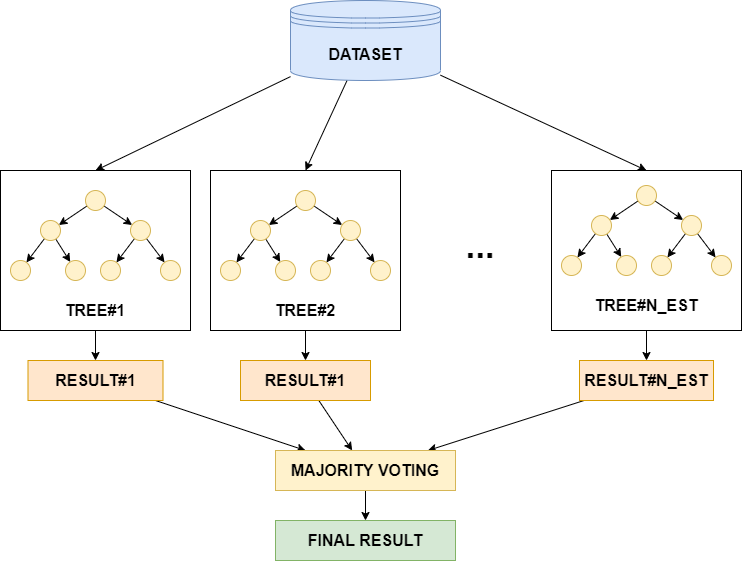

Sumber: Lab 4 KASDD Gasal 2023

### *Random Forest*

*Random Forest* merupakan salah satu variasi dari konsep *bagging* pada *ensemble learning* yang menggunakan Decision Tree sebagai basis modelnya. Setiap model yang dibangun berupa Decision Tree dan nantinya model tersebut dilatih dan digunakan untuk melakukan prediksi. Output dari Random Forest itu sendiri merupakan hasil prediksi yang paling banyak muncul di antara model-model Decision Tree.

In [56]:
# Melakukan training pada model random forest
rf_md = RandomForestRegressor()
rf_md.fit(X_train_perform, y_train_perform)

# Memprediksi data testing
predicted = rf_md.predict(X_test_perform)

# Menampilkan metrics
regression_metrics(predicted, y_test_perform)

MAE: 1.8935993220899476
MSE: 5.66069456202028
RMSE: 2.379221419292513
R_squared: 0.9848067036210981


In [57]:
rf_red_paramless = RandomForestClassifier()
rf_red_paramless.fit(X_train_obes, y_train_obes)

predicted = rf_red_paramless.predict(X_test_obes)

classification_metrics(predicted, y_test_obes)

Hasil Evaluasi berdasarkan classification report 

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.96      0.94        25
      Normal_Weight       0.89      0.86      0.88        29
     Obesity_Type_I       0.95      1.00      0.97        37
    Obesity_Type_II       1.00      0.96      0.98        25
   Obesity_Type_III       1.00      1.00      1.00        31
 Overweight_Level_I       0.91      0.94      0.93        34
Overweight_Level_II       0.96      0.90      0.93        30

           accuracy                           0.95       211
          macro avg       0.95      0.95      0.95       211
       weighted avg       0.95      0.95      0.95       211



Confusion Matrix



prediction,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
actual,,,,,,,
Insufficient_Weight,24,1,0,0,0,0,0
Normal_Weight,2,25,0,0,0,2,0
Obesity_Type_I,0,0,37,0,0,0,0
Obesity_Type_II,0,0,1,24,0,0,0
Obesity_Type_III,0,0,0,0,31,0,0
Overweight_Level_I,0,1,0,0,0,32,1
Overweight_Level_II,0,1,1,0,0,1,27




Accuracy: 0.9478672985781991
F1 Macro Average: 0.9471737449925806
F1 Micro Average: 0.9478672985781991
Precision Macro Average: 0.9490319204604919
Precision Micro Average: 0.9478672985781991
Recall Macro Average: 0.9461779194436396
Recall Micro Average: 0.9478672985781991



Terlihat bahwa terdapat perubahan pada metriknya.

Diharapkan untuk mempelajari kelebihan dan kekurangan dari setiap jenis model yang dipelajari agar kita bisa mengetahui pada dataset seperti apa suatu jenis model cocok untuk digunakan. Agar model yang dihasilkan lebih baik, kita juga harus bisa memilih *hyperparameter* yang sesuai dengan permasalahan yang ingin diselesaikan.

Adapun beberapa *hyperparameter* yang dapat kita eksplorasi pada Random Forest:
* `n_estimators`: Berapa banyak decision tree yang akan membentuk random forest
* `max_depth`: Kedalaman maksimal dari masing-masing Decision Tree
* `min_samples_split`: Jumlah sample minimal yang diperlukan untuk memecah suatu internal node pada setiap Decision Tree

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [dokumentasi Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

## Hyperparameter Tuning

Hyperparameter tuning dapat digunakan untuk mendapatkan hasil evaluasi yang terbaik untuk suatu model. Misalkan kita ingin mendapatkan parameter terbaik untuk model Decision Tree, maka kita harus mencoba berbagai kombinasi hyperparameter yang diinginkan. Untuk mempermudah mencari hyperparameter yang tepat, kita dapat menggunakan modul GridSearchCV dari library Scikit-Learn. Informasi lebih lanjut mengenai GridSearchCV dapat diakses [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Beberapa parameter yang sering digunakan, yaitu:
- `estimator`: model yang akan digunakan
- `param_grid`: kombinasi berbagai hyperparameter yang akan digunakan.
- `cv`: jumlah cross-validation yang ingin digunakan

In [58]:
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [7, 10, 15, 30],
               'max_depth' : [3, 5, 9, 12, None]}

dt = DecisionTreeRegressor()
clf = GridSearchCV(estimator= dt,
                   param_grid=param_grid, cv= 5)

clf.fit(X_train_perform, y_train_perform)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 5, 9, 12, None],
                         'min_samples_split': [7, 10, 15, 30]})

In [59]:
clf.best_params_

{'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_split': 15}

In [60]:
best_hp = DecisionTreeRegressor(**clf.best_params_)
best_hp.fit(X_train_perform, y_train_perform)
predicted = best_hp.predict(X_test_perform)
regression_metrics(predicted, y_test_perform)

MAE: 2.034646249583749
MSE: 6.536318018795105
RMSE: 2.5566223848654506
R_squared: 0.9824565314736098


Sekarang kita mendapatkan kombinasi terbaik dari berbagai kombinasi hyperparameter yang telah kita coba.

## Kaggle Competition!

Dalam rangka menerapkan pemahaman kalian pada materi CART dan sebagai sarana untuk berlatih, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 4 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Regression Case](https://www.kaggle.com/t/72f29cab31c54875825b92eb03053534)
*   [Kaggle Competition Classification Case](https://www.kaggle.com/t/8eaa13f32e244834a49647f12a7efb1a)

**Penilaian**

Untuk mendapatkan nilai penuh pada lab 4 ini, kalian **diwajibkan** untuk mengikuti kedua kompetisi kaggle di atas.


username kaggle : posty_melek

1. Student Performance Regreesion 

1.1 Preprocesiing

In [2]:
import pandas as pd 
import numpy as np

df_student_regres_train = pd.read_csv("regresi-lab-4/student_performance_train.csv")
df_student_regres_test = pd.read_csv("regresi-lab-4/student_performance_test.csv")

In [6]:
# cek tipe data 
df_student_regres_train.info()
#data tidak ada yang null
# data sudah dalam kategori yang benar 
#outliers tidak perlu dicek karena random forest tidak sensifitfi terhadap outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                6000 non-null   object 
 1   Hours Studied                     6000 non-null   int64  
 2   Previous Scores                   6000 non-null   int64  
 3   Extracurricular Activities        6000 non-null   object 
 4   Sleep Hours                       6000 non-null   int64  
 5   Sample Question Papers Practiced  6000 non-null   int64  
 6   Performance Index                 6000 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 328.2+ KB


In [11]:
df_student_regres_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   id                                4000 non-null   object
 1   Hours Studied                     4000 non-null   int64 
 2   Previous Scores                   4000 non-null   int64 
 3   Extracurricular Activities        4000 non-null   object
 4   Sleep Hours                       4000 non-null   int64 
 5   Sample Question Papers Practiced  4000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 187.6+ KB


1.2 Data Analysis

In [7]:
#liat distribusi untuk tahu data 
df_student_regres_train.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,5.015667,69.601333,6.527833,4.567167,55.425667
std,2.586994,17.384498,1.697068,2.875274,19.280243
min,1.000000,40.000000,4.000000,0.000000,11.000000
25%,3.000000,55.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,56.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [12]:
df_student_regres_test.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.958750,69.212250,6.534750,4.607500
std,2.592726,17.280491,1.694258,2.855605
min,1.000000,40.000000,4.000000,0.000000
25%,3.000000,54.000000,5.000000,2.000000
50%,5.000000,69.000000,7.000000,5.000000
75%,7.000000,84.000000,8.000000,7.000000
max,9.000000,99.000000,9.000000,9.000000


In [8]:
df_student_regres_train.skew()
#skew nya kecil sekali -> kemungkinan besar data terdisitirbusi normal

C:\Users\ACER\AppData\Local\Temp\ipykernel_6720\2124426490.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_student_regres_train.skew()


Hours Studied                      -0.009236
Previous Scores                    -0.000572
Sleep Hours                        -0.031935
Sample Question Papers Practiced   -0.032476
Performance Index                  -0.011751
dtype: float64

In [13]:
df_student_regres_test.skew()

C:\Users\ACER\AppData\Local\Temp\ipykernel_6720\2711749344.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_student_regres_test.skew()


Hours Studied                       0.003444
Previous Scores                     0.011764
Sleep Hours                        -0.050832
Sample Question Papers Practiced   -0.040141
dtype: float64

In [17]:
df_student_regres_train.corr()
#previsous score punya correlasi yang besar pada performance index

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,ratio_study_sleep
Hours Studied,1.000000,-0.013267,0.005368,0.033362,0.371188,0.847945
Previous Scores,-0.013267,1.000000,0.014858,0.010260,0.915881,-0.012702
Sleep Hours,0.005368,0.014858,1.000000,0.006654,0.058766,-0.454233
Sample Question Papers Practiced,0.033362,0.010260,0.006654,1.000000,0.053405,0.029118
Performance Index,0.371188,0.915881,0.058766,0.053405,1.000000,0.293200
ratio_study_sleep,0.847945,-0.012702,-0.454233,0.029118,0.293200,1.000000


1.3 Feature Engineering

In [18]:
#salah satu contoh membuat fitur baru adalah perbandingan antara hours studied dan sleep hours
df_student_regres_train['ratio_study_sleep'] = df_student_regres_train['Hours Studied'] / df_student_regres_train['Sleep Hours']
df_student_regres_test['ratio_study_sleep'] = df_student_regres_test['Hours Studied'] / df_student_regres_test['Sleep Hours']

In [16]:
df_student_regres_train

,id,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,ratio_study_sleep
0,SP3194,1,75,Yes,9,5,50.0,0.111111
1,SP3624,5,54,Yes,5,1,36.0,1.000000
2,SP3631,3,51,No,7,6,34.0,0.428571
3,SP2891,8,81,No,4,1,74.0,2.000000
4,SP5757,9,58,No,8,7,59.0,1.125000
...,...,...,...,...,...,...,...,...
5995,SP9285,3,68,Yes,9,6,49.0,0.333333
5996,SP6591,2,76,Yes,6,1,54.0,0.333333
5997,SP5721,5,78,Yes,5,9,64.0,1.000000
5998,SP2706,1,92,Yes,6,9,66.0,0.166667


In [19]:
#melakauakn drop fitur sleep hours karena saya mau berekspreirmen dengan asumsi fitur tersebut sudah digantikan dengan fitur baru ratio_study_sleep
df_student_regres_train.drop(columns='Sleep Hours', inplace=True)
df_student_regres_test.drop(columns='Sleep Hours', inplace=True)

In [22]:
#encode extracurricular activities
#import labelecoder
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
df_student_regres_train['Extracurricular Activities'] = label_encoder.fit_transform(df_student_regres_train['Extracurricular Activities'])
df_student_regres_test['Extracurricular Activities'] = label_encoder.fit_transform(df_student_regres_test['Extracurricular Activities'])

In [24]:
df_student_regres_test

,id,Hours Studied,Previous Scores,Extracurricular Activities,Sample Question Papers Practiced,ratio_study_sleep
0,SP9749,3,74,1,8,0.375000
1,SP8695,8,80,1,5,2.000000
2,SP9801,4,50,1,6,0.666667
3,SP8469,7,92,0,4,1.166667
4,SP8165,6,75,1,0,1.500000
...,...,...,...,...,...,...
3995,SP2775,7,53,1,8,1.750000
3996,SP2735,5,62,0,5,1.250000
3997,SP9331,9,76,0,8,1.000000
3998,SP1689,3,82,0,8,0.600000


1.4 Data Splitting 

In [34]:
#Data sudah dibagi jadi train dan test => tinggal dibagi bedasarkan X dan y
X_train_student_regress = df_student_regres_train.drop(columns='Performance Index')
y_train_student_regress = df_student_regres_train['Performance Index']
#X test nyamemasung sudah drop perforamnce index
#drop id di train dan test
X_test_student_regress = df_student_regres_test.drop(columns='id')
X_train_student_regress.drop(columns='id', inplace=True)

In [37]:
X_test_student_regress

,Hours Studied,Previous Scores,Extracurricular Activities,Sample Question Papers Practiced,ratio_study_sleep
0,3,74,1,8,0.375000
1,8,80,1,5,2.000000
2,4,50,1,6,0.666667
3,7,92,0,4,1.166667
4,6,75,1,0,1.500000
...,...,...,...,...,...
3995,7,53,1,8,1.750000
3996,5,62,0,5,1.250000
3997,9,76,0,8,1.000000
3998,3,82,0,8,0.600000


1.5 Modelling 

1.5.1 Hyperparamater Tuning

In [41]:
#import random forest regressor
#import ignore warning
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid_kaggle = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'], 
               'min_samples_split': [7, 10, 15, 30],
               'max_depth' : [3, 5, 9, 12, None]}
rf_regress_kaggle = RandomForestRegressor()

clf_regress_kaggle = GridSearchCV(estimator= rf_regress_kaggle,
                   param_grid=param_grid_kaggle, cv= 5)
clf_regress_kaggle.fit(X_train_student_regress, y_train_student_regress)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 5, 9, 12, None],
                         'min_samples_split': [7, 10, 15, 30]})

In [42]:
clf_regress_kaggle.best_params_

{'criterion': 'absolute_error', 'max_depth': None, 'min_samples_split': 10}

1.5.2 Buat model dengan best params Fit dan predict data test

In [44]:
#buat model random forest dengan hyperparameter terbaik
best_hp_regress = RandomForestRegressor(**clf_regress_kaggle.best_params_)
best_hp_regress.fit(X_train_student_regress, y_train_student_regress)
predicted_regress = best_hp_regress.predict(X_test_student_regress)
predicted_regress

array([55.53 , 72.92 , 33.165, ..., 74.01 , 62.06 , 52.165])

In [50]:
#isi dari sample sumbmiision punya data
submission = pd.read_csv("regresi-lab-4/sp_sample_submission.csv")
submission['Performance Index'] = predicted_regress
submission.to_csv("submission.csv", index=False)

In [51]:
pd.read_csv("submission.csv")

,id,Performance Index
0,SP9749,55.530
1,SP8695,72.920
2,SP9801,33.165
3,SP8469,84.350
4,SP8165,62.395
...,...,...
3995,SP2775,42.915
3996,SP2735,48.360
3997,SP9331,74.010
3998,SP1689,62.060


In [52]:
# copy_X_tes.shape

(4000, 6)

In [48]:
# copy_X_tes = pd.read_csv("regresi-lab-4/student_performance_test.csv")
# copy_X_tesa

Obesity Multiclass Classification 

In [55]:
df_kaggle_obes_train = pd.read_csv("klasifikasi-lab-4/obesity_train.csv")
df_kaggle_obes_test = pd.read_csv("klasifikasi-lab-4/obesity_test.csv")


In [56]:
df_kaggle_obes_test.shape

(1056, 16)

In [58]:
df_kaggle_obes_train.shape

(1055, 17)

In [59]:
df_kaggle_obes_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1055 non-null   object 
 1   Gender                          1055 non-null   object 
 2   Age                             1055 non-null   int64  
 3   Height                          1055 non-null   float64
 4   Weight                          1055 non-null   float64
 5   family_history_with_overweight  1055 non-null   object 
 6   FAVC                            1055 non-null   object 
 7   FCVC                            1055 non-null   int64  
 8   NCP                             1055 non-null   int64  
 9   CAEC                            1055 non-null   object 
 10  SMOKE                           1055 non-null   object 
 11  CH2O                            1055 non-null   float64
 12  FAF                             10

In [60]:
df_kaggle_obes_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1056 non-null   object 
 1   Gender                          1056 non-null   object 
 2   Age                             1056 non-null   int64  
 3   Height                          1056 non-null   float64
 4   Weight                          1056 non-null   float64
 5   family_history_with_overweight  1056 non-null   object 
 6   FAVC                            1056 non-null   object 
 7   FCVC                            1056 non-null   int64  
 8   NCP                             1056 non-null   int64  
 9   CAEC                            1056 non-null   object 
 10  SMOKE                           1056 non-null   object 
 11  CH2O                            1056 non-null   float64
 12  FAF                             10

In [65]:
df_kaggle_obes_train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS,ObesityLevel
0,OBX0968,Male,24,1.700000,85.000000,yes,yes,2,3,Frequently,no,3.000000,0,1,Frequently,Public_Transportation,Overweight_Level_II
1,OBX0848,Female,21,1.486484,60.117993,yes,no,2,1,Sometimes,no,1.000000,0,0,no,Public_Transportation,Overweight_Level_II
2,OBX01416,Female,26,1.618867,110.777391,yes,yes,3,3,Sometimes,no,2.618198,0,0,Sometimes,Public_Transportation,Obesity_Type_III
3,OBX0761,Female,23,1.644161,84.340406,yes,yes,2,3,Sometimes,no,2.715572,2,0,no,Public_Transportation,Obesity_Type_I
4,OBX0604,Female,25,1.628470,107.218949,yes,yes,3,3,Sometimes,no,2.487070,0,0,Sometimes,Public_Transportation,Obesity_Type_III
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,OBX01721,Female,18,1.692242,90.019501,yes,yes,2,3,Sometimes,no,1.904054,1,0,Sometimes,Public_Transportation,Obesity_Type_I
1051,OBX0854,Female,25,1.640741,104.808542,yes,yes,3,3,Sometimes,no,2.653531,0,0,Sometimes,Public_Transportation,Obesity_Type_III
1052,OBX02069,Female,25,1.662978,110.930509,yes,yes,3,3,Sometimes,no,1.679489,0,0,Sometimes,Public_Transportation,Obesity_Type_III
1053,OBX01711,Female,20,1.738717,128.114161,yes,yes,3,3,Sometimes,no,1.797041,1,0,Sometimes,Public_Transportation,Obesity_Type_III


In [61]:
df_kaggle_obes_train.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,23.880569,1.701977,86.632155,2.218957,2.522275,2.013240,0.743128,0.368720
std,6.087826,0.092295,26.367803,0.610177,0.829500,0.614805,0.838692,0.577543
min,14.000000,1.481682,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.000000,1.629466,66.000000,2.000000,2.000000,1.548393,0.000000,0.000000
50%,22.000000,1.700627,83.014033,2.000000,3.000000,2.000000,1.000000,0.000000
75%,26.000000,1.769081,107.298825,3.000000,3.000000,2.504052,1.000000,1.000000
max,55.000000,1.931263,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [63]:
df_kaggle_obes_train.duplicated().sum()

0

In [87]:
#melakukaan encoding kepada categorical data 
label_encoder = LabelEncoder()
categorical_cols = [col for col in df_kaggle_obes_train.select_dtypes(include=['object', 'category']).columns if col != 'ObesityLevel']
for col in categorical_cols:
    df_kaggle_obes_train[col] = label_encoder.fit_transform(df_kaggle_obes_train[col])
    df_kaggle_obes_test[col] = label_encoder.fit_transform(df_kaggle_obes_test[col])


In [88]:
#bagi X dan y di train da test 
X_train_obes_kaggle = df_kaggle_obes_train.drop(columns='ObesityLevel')
y_train_obes_kaggle = df_kaggle_obes_train['ObesityLevel']
X_test_obes_kaggle = df_kaggle_obes_test.drop(columns='id')
X_train_obes_kaggle.drop(columns='id', inplace=True)


In [89]:
X_train_obes_kaggle

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS_0,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4
0,1,24,1.700000,85.000000,1,1,2,3,1,0,3.000000,0,1,0,0,0,0,1,0
1,0,21,1.486484,60.117993,1,0,2,1,2,0,1.000000,0,0,2,0,0,0,1,0
2,0,26,1.618867,110.777391,1,1,3,3,2,0,2.618198,0,0,1,0,0,0,1,0
3,0,23,1.644161,84.340406,1,1,2,3,2,0,2.715572,2,0,2,0,0,0,1,0
4,0,25,1.628470,107.218949,1,1,3,3,2,0,2.487070,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0,18,1.692242,90.019501,1,1,2,3,2,0,1.904054,1,0,1,0,0,0,1,0
1051,0,25,1.640741,104.808542,1,1,3,3,2,0,2.653531,0,0,1,0,0,0,1,0
1052,0,25,1.662978,110.930509,1,1,3,3,2,0,1.679489,0,0,1,0,0,0,1,0
1053,0,20,1.738717,128.114161,1,1,3,3,2,0,1.797041,1,0,1,0,0,0,1,0


2.1 Model

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

# Mendefinisikan grid parameter
param_grid_kaggle = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

rf_classifier_kaggle = RandomForestClassifier()

clf_classifier_kaggle = GridSearchCV(estimator=rf_classifier_kaggle,
                                     param_grid=param_grid_kaggle,
                                     cv=5)

clf_classifier_kaggle.fit(X_train_obes_kaggle, y_train_obes_kaggle)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

In [79]:
clf_classifier_kaggle.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 250}

Cross Validation

In [90]:

from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
best_hp_classifier = RandomForestClassifier(**clf_classifier_kaggle.best_params_)

scores = cross_val_score(best_hp_classifier, X_train_obes_kaggle, y_train_obes_kaggle, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation:{scores.mean()}')

Hasil Evaluasi cross validation:0.9345971563981041


In [91]:
#predict dengan best param 

best_hp_classifier.fit(X_train_obes_kaggle, y_train_obes_kaggle)
predicted_classifier = best_hp_classifier.predict(X_test_obes_kaggle)


In [92]:
#masukkan haris predicted_classifer ke ob_sample_submission.cv
submission_classifier = pd.read_csv("klasifikasi-lab-4/ob_sample_submission.csv")
submission_classifier['ObesityLevel'] = predicted_classifier
submission_classifier.to_csv("submission_classifier.csv", index=False)

# Latihan Soal

## SOAL 2 [10]

### SOAL 2a
[2.5] Bangun dan latih 2 model decision tree (decision tree regressor untuk student performance dan decision tree classifier untuk obesity risk) dengan memberikan nilai pada *hyperparameter*:
- `max_depth = 7`
- `random_state = 4048`.

**Jawaban**

Decision Tree Classifier untuk obesity risk

In [61]:
# code here
#Bangun decision tree classifier untuk obesity risk 
dtc_obes_coba = DecisionTreeClassifier(max_depth=7, random_state=4048)
#arti random_state = 4048 adalah random seed yang digunakan untuk menghasilkan angka random yang sama
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dtc_obes_coba, X_train_obes, y_train_obes, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation:{scores.mean()}')
dtc_obes_coba.fit(X_train_obes, y_train_obes)
#TES ini sampai evaluasi atau tidak?


Hasil Evaluasi cross validation:0.8696604677373909


DecisionTreeClassifier(max_depth=7, random_state=4048)

Evaluasi dari DTC_OBES_COBA

In [62]:
# Predict testing data
prediction = dtc_obes_coba.predict(X_test_obes)

# Eval the prediction
classification_metrics(prediction, y_test_obes)

Hasil Evaluasi berdasarkan classification report 

                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.92      0.90        25
      Normal_Weight       0.85      0.76      0.80        29
     Obesity_Type_I       0.88      0.95      0.91        37
    Obesity_Type_II       0.96      0.92      0.94        25
   Obesity_Type_III       1.00      1.00      1.00        31
 Overweight_Level_I       0.85      0.82      0.84        34
Overweight_Level_II       0.84      0.87      0.85        30

           accuracy                           0.89       211
          macro avg       0.89      0.89      0.89       211
       weighted avg       0.89      0.89      0.89       211



Confusion Matrix



prediction,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
actual,,,,,,,
Insufficient_Weight,23,2,0,0,0,0,0
Normal_Weight,3,22,0,0,0,4,0
Obesity_Type_I,0,0,35,1,0,0,1
Obesity_Type_II,0,0,2,23,0,0,0
Obesity_Type_III,0,0,0,0,31,0,0
Overweight_Level_I,0,2,0,0,0,28,4
Overweight_Level_II,0,0,3,0,0,1,26




Accuracy: 0.8909952606635071
F1 Macro Average: 0.8911581593606496
F1 Micro Average: 0.8909952606635071
Precision Macro Average: 0.8930424414295383
Precision Micro Average: 0.8909952606635071
Recall Macro Average: 0.8906803877189271
Recall Micro Average: 0.8909952606635071



Decision Tree Regressor untuk Student Performance

In [63]:
dtr_perform_coba = DecisionTreeRegressor(max_depth=7, random_state=4048)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dtr_perform_coba, X_train_perform, y_train_perform, scoring='r2', cv=kfold)
print(f'Hasil Evaluasi cross validation:{scores.mean()}')
dtr_perform_coba.fit(X_train_perform, y_train_perform)


Hasil Evaluasi cross validation:0.9791034863271829


DecisionTreeRegressor(max_depth=7, random_state=4048)

Evaluasi dari DTR_PERFORM_COBA

In [64]:
# Predict testing data
prediction_coba_perform = dtr_perform_coba.predict(X_test_perform)

# Eval the prediction
regression_metrics(prediction_coba_perform, y_test_perform)

MAE: 2.2292296950297343
MSE: 7.675840307386401
RMSE: 2.7705306905693
R_squared: 0.9793980552263499


### SOAL 2b
[2.5]  Visualisasikan 2 model decision tree (decision tree regressor untuk student performance dan decision tree classifier untuk obesity risk) yang didapat pada soal 1a!

**Jawaban**

Visualisasi Decision Tree Classifier untuk Obesity Risk

In [65]:
#visualisasi dari decision tree coba yag sudah dibuat 
#tidak perlu difit lagi berarti 
X_obes = pd.concat([X_train_obes, X_test_obes], axis=0)
print(tree.export_text(dtc_obes_coba, feature_names=pd.Series(X_obes.columns).array))

|--- Weight <= 99.93
|   |--- Weight <= 60.31
|   |   |--- Height <= 1.66
|   |   |   |--- Weight <= 47.03
|   |   |   |   |--- NCP <= 3.50
|   |   |   |   |   |--- class: Insufficient_Weight
|   |   |   |   |--- NCP >  3.50
|   |   |   |   |   |--- class: Normal_Weight
|   |   |   |--- Weight >  47.03
|   |   |   |   |--- Height <= 1.51
|   |   |   |   |   |--- class: Overweight_Level_I
|   |   |   |   |--- Height >  1.51
|   |   |   |   |   |--- Height <= 1.64
|   |   |   |   |   |   |--- Age <= 16.50
|   |   |   |   |   |   |   |--- class: Overweight_Level_I
|   |   |   |   |   |   |--- Age >  16.50
|   |   |   |   |   |   |   |--- class: Normal_Weight
|   |   |   |   |   |--- Height >  1.64
|   |   |   |   |   |   |--- Weight <= 53.00
|   |   |   |   |   |   |   |--- class: Insufficient_Weight
|   |   |   |   |   |   |--- Weight >  53.00
|   |   |   |   |   |   |   |--- class: Normal_Weight
|   |   |--- Height >  1.66
|   |   |   |--- CAEC <= 0.50
|   |   |   |   |--- class: Normal

Visualisasi Decision Tree Regressor untuk Student 

In [66]:
# code here
X_perf = pd.concat([X_train_perform, X_test_perform], axis=0)
print(tree.export_text(dtr_perform_coba, feature_names=pd.Series(X_perf.columns).array))

|--- Previous Scores <= 69.50
|   |--- Previous Scores <= 52.50
|   |   |--- Hours Studied <= 4.50
|   |   |   |--- Previous Scores <= 46.50
|   |   |   |   |--- Hours Studied <= 2.50
|   |   |   |   |   |--- Previous Scores <= 42.50
|   |   |   |   |   |   |--- Sample Question Papers Practiced <= 6.50
|   |   |   |   |   |   |   |--- value: [14.95]
|   |   |   |   |   |   |--- Sample Question Papers Practiced >  6.50
|   |   |   |   |   |   |   |--- value: [17.25]
|   |   |   |   |   |--- Previous Scores >  42.50
|   |   |   |   |   |   |--- Hours Studied <= 1.50
|   |   |   |   |   |   |   |--- value: [18.25]
|   |   |   |   |   |   |--- Hours Studied >  1.50
|   |   |   |   |   |   |   |--- value: [21.05]
|   |   |   |   |--- Hours Studied >  2.50
|   |   |   |   |   |--- Previous Scores <= 41.50
|   |   |   |   |   |   |--- Hours Studied <= 3.50
|   |   |   |   |   |   |   |--- value: [19.43]
|   |   |   |   |   |   |--- Hours Studied >  3.50
|   |   |   |   |   |   |   |--- value:

### SOAL 2c

[2.5]  Jika model decision tree regressor diberikan data aktual Performance Index 80, tentukan attribut-attribut yang menghasilkan hasil prediksi terdekat dengan data aktual tersebut. Berikan juga Mean Squared Error dari hasil prediksi dengan data aktual `Performance Index` dari data X?    

**Catatan:** Tidak harus melakukan implementasi kode pada bagian ini

**Jawaban**

Hours Studied >  7.50
|   |   |   |   |   |--- Previous Scores <= 87.50
|   |   |   |   |   |   |--- Hours Studied <= 8.50
|   |   |   |   |   |   |   |--- value: [80.25]


Ini adalah salah satu subtree did alam decision tree regressor yang memberikan nilai prediksi yang mendekati performance index 80 yakni 80.25.
Dari visualisasi atribut yang menghasilkan hasil prediksi terdekat dengan data tersebut adalah Previous Score (kurang dari  dan sama dengan 87.50) dan Hours Studied (kurang dari dan sama dengan 8.50).


In [67]:
from sklearn.metrics import mean_squared_error

# Hitung MSE antara prediksi dan nilai target aktual
mse = mean_squared_error(y_test_perform, prediction_coba_perform)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 7.675840307386401


### SOAL 2d

[2.5]  Untuk decision tree classifier, tentukan atribut-atribut dari suatu level obesitas yang paling berpotensi untuk dikategorikan sebagai kelas 2. Jika terdapat berbagai kemungkinan pasangan atribut yang paling berpotensi, tuliskan salah satu kemungkinan atribut-atributnya.

**Jawaban**

Obesitas Level 2
Untuk atribut yang bisa dikategorikan sebagai kelas 2, ada :
- Nilai atribut weight lebih dari 89.99, height kurang dari sama dengan 1.79 dan CH20 kurang dari sama dengan 1.19
- Nilai atribut weight lebih dari 99.93, dengan gender lebih dari 0.50, weight kurang dari sama dengan 109.74, dan height kurang dari sama dengan 1.73
- Nilai atribut weight diatas 109.74, dengan age lebih dari sama dengan 21.50, dan height kurang dari sama dengan 1.85
- Nilai atribut weight diatas 109.74, age kurang dari 21.50


Dari kombinasi ini saya merasa atribut yang penting digunakan untuk mengkategorikan kelas 2 obesity adalah attribute weight, height, gender, dan age.




## SOAL 3 [15]

### SOAL 3a

[2] Implementasikan 2 model Random Forest (Random Forest Regressor untuk Student Performance dan Random Forest Classifier untuk Obesity Risk) Implementasi pada soal ini akan menggunakan nilai *hyperparameter*
- `max_depth = 7`
- `random_state = 4048`

**Jawaban**

Random Forest Regression untuk Student Performance

In [68]:
# code here
# Melakukan training pada model random forest
rf_md_coba = RandomForestRegressor(max_depth=7, random_state=4048)
rf_md_coba.fit(X_train_perform, y_train_perform)

# Memprediksi data testing
predicted = rf_md.predict(X_test_perform)

# Menampilkan metrics
regression_metrics(predicted, y_test_perform)

MAE: 1.8935993220899476
MSE: 5.66069456202028
RMSE: 2.379221419292513
R_squared: 0.9848067036210981


Random Forest Classifier untuk Obesity Risk

In [69]:
rf_red_coba = RandomForestClassifier(max_depth=7, random_state=4048)
rf_red_coba.fit(X_train_obes, y_train_obes)

predicted = rf_red_coba.predict(X_test_obes)

classification_metrics(predicted, y_test_obes)

Hasil Evaluasi berdasarkan classification report 

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        25
      Normal_Weight       0.86      0.86      0.86        29
     Obesity_Type_I       0.92      0.95      0.93        37
    Obesity_Type_II       0.96      0.96      0.96        25
   Obesity_Type_III       1.00      1.00      1.00        31
 Overweight_Level_I       0.86      0.88      0.87        34
Overweight_Level_II       0.89      0.80      0.84        30

           accuracy                           0.92       211
          macro avg       0.92      0.92      0.92       211
       weighted avg       0.92      0.92      0.92       211



Confusion Matrix



prediction,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
actual,,,,,,,
Insufficient_Weight,25,0,0,0,0,0,0
Normal_Weight,1,25,0,0,0,3,0
Obesity_Type_I,0,0,35,1,0,0,1
Obesity_Type_II,0,0,1,24,0,0,0
Obesity_Type_III,0,0,0,0,31,0,0
Overweight_Level_I,0,2,0,0,0,30,2
Overweight_Level_II,0,2,2,0,0,2,24




Accuracy: 0.919431279620853
F1 Macro Average: 0.9210664194660741
F1 Micro Average: 0.919431279620853
Precision Macro Average: 0.9215274006666279
Precision Micro Average: 0.919431279620853
Recall Macro Average: 0.9214811218056653
Recall Micro Average: 0.919431279620853



### SOAL 3b

[8] Lakukan cross validation untuk kedua model random forest pada nomor 3a dan tampilkan rata-rata hasil evaluasi cross validationnya dengan menggunakan scoring metric yang paling tepat untuk masing-masing kasus yang ingin diprediksi. Untuk mendapatkan poin penuh pada nomor ini, berikan pula alasan pemilihan masing-masing scoring metric tersebut. Terakhir, jangan lupa untuk memanggil method fit untuk membangun tree berdasarkan data training.

Cross Validation untuk Model Random Forest Regression Student Performance

In [70]:
#code here
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#TES PAKAI MSE
rf_md_coba.fit(X_train_perform, y_train_perform)
#mse di cross validation menggunakan negatif -> karena memang tujuannya memaksimalkan kinerja model dengan cross validation. Dengan keterangan untuk nilai yang lebih kecil, karena semakin kecil MSE, semakin baik kinerja modelnya.
scores = cross_val_score(rf_md_coba , X_train_perform, y_train_perform, scoring='neg_mean_squared_error', cv=kfold)
print(f'Hasil Evaluasi cross validation:{np.abs(scores.mean())}')


Hasil Evaluasi cross validation:5.801324011777199


Alasan menggunakan scoring matrix MSE, antara lain:
- tipe data adalah regresi => salah satu metrik yang dapat digunakan adalah MSE
- MSE memberikan ukuran langsung tentang seberapa besar kesalahan prediksi dalam satuan yang sama dengan variabel target, yaitu performance index. Ini mengindikasikan seberapa akurat odel dalam memprediksi nilai performance index
- MSE sensitif terhadap kesalahan, karena memberikan penalti yang lebih besar terhadap kesalahan prediksi yang signifikan. Ini penting, karena metrik score seperti R2 cenderung memberikan penilaian yang lebih rendah terhadap model ketika terdapat outlier, dan berujung tidak memberikan informasi yang spesifik tentang seberapa besar kesalahan prediksi tersebut.
- MSE lebih fokus langsung mengukur kesalahan prediksi, sedangkan R2 memang berfokus pada seberapa baik variabilitas total dalam data yang dapat dijelaskan oleh model.


Cross Validation untuk Model Random Forest Classifier Obesity Level

In [71]:
# code here

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#TES PAKAI ACCURACY
rf_red_coba.fit(X_train_obes, y_train_obes)
scores = cross_val_score(rf_red_coba, X_train_obes, y_train_obes, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation:{scores.mean()}')

Hasil Evaluasi cross validation:0.88385460693153


Alasan menggunakan scoring metric accuracy, antara lain:
- Tiap kelas dari kelas dataset ini bersifat balance, sehingga accuracy yang memang sensitif terhadap imbalance tidak akan berpengaruh pada dataset ini.
- Tujuan utama untuk mengklasifikasikan orang ke dalam kategori level obesitas yang benar, dan ini dapat ditunjukkan atau diukur dengan accuracy.
- Accuracy memberikan interpretasi yang mudah, karena menggambarkan persentase prediksi yang benar dari total prediksi. Ini membuat stakeholder yang lain dapat mengetahui maksud dari interpretasi ini.





### SOAL 3c

[5] Jelaskan bagaimana perbedaaan cara pengambilan keputusan pada model Random Forest Regressor dan Classifier di tiap node-nya dan apa pengaruhnya terhadap hasil keputusan?

**Jawaban**

Keduanya menggunakan pendekatan ensemble learning dari decision tree. Perbedaan pada keduanya, antara lain:
- Pada random forest regressor, nilai prediksi merupakan nilai kontinu yang berasal dari estimasi dari nilai rata-rata target variabel dalam leaf node. Perhitungan nilai rata-rata dalam setiap cabang berdasarkan pertimbangan perhitungan error untuk tiap perusahaan, untuk meminimalkan varians prediksi di setiap cabang, Salah satu metrik yang digunakan untuk pemisahan ini adalah MSE.
- Pada random forest classifier, nilai prediksi adalah kelas diskrit yang didapatkan dari mayoritas kelas dari sampel yang jatuh di leaf node. Pembuat node denga pertimbanga pemisahan bedasarkan keuntungan informasi yang harus dibuat semaksimal mungkin atau impurity yang harus dikurangi di setiap cabanng. Impurity dikuru biasanya dengan metrik Gini atau entropi.
#TES







## SOAL 4 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan regresi (Dataset Student Performance) (`X_test`) menggunakan model yang sudah dibangun pada soal 2 dan 3.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai MAE, MSE, RMSE, dan $R^{2}$ dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi dari kedua model yang sudah didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

**Jawaban**

* Prediksi Student Performance dengan Model Decision Tree pada Soal nomor 2

In [75]:
# Predict testing data
prediction_student_coba = dtr_perform_coba.predict(X_test_perform)



Prediksi Student Performance dengan Model Random Forest pada Soal nomor 3

In [76]:
# Predict testing data
prediction_student_coba_rf = rf_md_coba.predict(X_test_perform)



* Evaluasi kedua model

In [77]:
# Eval the prediction dari dt regression 
regression_metrics(prediction_student_coba, y_test_perform)

MAE: 2.2292296950297343
MSE: 7.675840307386401
RMSE: 2.7705306905693
R_squared: 0.9793980552263499


In [78]:
# Eval the prediction dari rf
regression_metrics(prediction_student_coba_rf, y_test_perform)

MAE: 1.963876146605578
MSE: 5.876717381113691
RMSE: 2.424194171495693
R_squared: 0.9842268986732896


* Perbandingan dan analisis dari perbandingan tersebut 

Model satu menggunakan decision tree yang sudah di fine tuning , dan model kedua menggunakan random forest dengan max_depth juga 7.
1. Model pertama memiliki nilai MAE sebesar 2.229, sedangkan model kedua memiliki MAE sebesar 1.964. Model kedua dengan MAE yang lebih rendah menunjukkan bahwa model tersebut memiliki kecenderungan untuk melakukan prediksi yang lebih akurat.
2. Model pertama memiliki MSE sebesar 7.676, sedangkan model kedua memiliki MSE sebesar 5.877. Ini menunjukkan bawah model kedua memiliki kecenderungan untuk melakukan kprediksi yang lebih dekat dengan nilai sebenarnya daripada model pertama.
3. Model pertama memiliki RMSE sebesar 2.771, sedangkan model kedua memiliki RMSE sebesar 2.424. Ini menunjukan bahwa model kedua memiliki kecenderungan untuk memiliki kesalahan prediksi yang lebih kecil daripada model pertama.
4. Model pertama memiliki R-squared sebesar 0.979, sedangkan model kedua memiliki R-squared sebesar 0.984. Ini menunjukkan bahwa model tersebut mampu menjelaskan variasi dalam data lebih baik daripada model pertama.
5. Perbedaan nilai performa tersebut meskipun dengan hyperapraptermet max_depth yang sama disebabkan oleh beberapa faktor, seperti model kedua berupa random forest memiliki kemampuan yang lebih baik dalam menangkap pola dan hubungan non Linear dalam data dibandingkan dengan model pertama (Decision Tree). Random forest juga lebih baik dalam mengatasi overfitting karena menggabungkan beberapa decision tree yang berbeda. Ensemble nature dari random forest dapat meningkatkan akurasi prediksi karena nilai prediksi merupakan gabungan dari beberapa pohon keputusan yang berbeda.





## SOAL 5 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan klasifikasi (Dataset Obesity Risk) (`X_test`) menggunakan model yang sudah dibangun pada soal 1 dan 2.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai Accuracy, Precision, Recall, dan F1-Score dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi yang didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

**Jawaban**

* Prediksi terhadap data testing dari dataset obesity risk pada soal 1 dan 2 

In [82]:
#based dari soal 1 -> dtc tanpa adanya hyperparameter tuning
prediction_obes_coba_soal1 = dtc_obes.predict(X_test_obes)


In [83]:
#based dari soal 2 -> dtc dengan hyperparameter max_depth=7, random_state=4048
prediction_obes_coba_soal2 = dtc_obes_coba.predict(X_test_obes)


* Evaluasi dari hasil prediksi yang dilakukan

In [84]:
#based dari soal 1 
classification_metrics(prediction_obes_coba_soal1, y_test_obes)

Hasil Evaluasi berdasarkan classification report 

                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.64      0.74        25
      Normal_Weight       0.50      0.34      0.41        29
     Obesity_Type_I       0.71      0.27      0.39        37
    Obesity_Type_II       0.95      0.80      0.87        25
   Obesity_Type_III       1.00      1.00      1.00        31
 Overweight_Level_I       0.55      0.71      0.62        34
Overweight_Level_II       0.41      0.87      0.56        30

           accuracy                           0.65       211
          macro avg       0.72      0.66      0.66       211
       weighted avg       0.71      0.65      0.64       211



Confusion Matrix



prediction,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
actual,,,,,,,
Insufficient_Weight,16,8,0,0,0,1,0
Normal_Weight,2,10,0,0,0,17,0
Obesity_Type_I,0,0,10,1,0,0,26
Obesity_Type_II,0,0,3,20,0,0,2
Obesity_Type_III,0,0,0,0,31,0,0
Overweight_Level_I,0,1,0,0,0,24,9
Overweight_Level_II,0,1,1,0,0,2,26




Accuracy: 0.6492890995260664
F1 Macro Average: 0.6555136846121433
F1 Micro Average: 0.6492890995260664
Precision Macro Average: 0.7162440733869305
Precision Micro Average: 0.6492890995260664
Recall Macro Average: 0.6610924108692872
Recall Micro Average: 0.6492890995260664



In [85]:
#based dari soal 2 
classification_metrics(prediction_obes_coba_soal2, y_test_obes)

Hasil Evaluasi berdasarkan classification report 

                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.92      0.90        25
      Normal_Weight       0.85      0.76      0.80        29
     Obesity_Type_I       0.88      0.95      0.91        37
    Obesity_Type_II       0.96      0.92      0.94        25
   Obesity_Type_III       1.00      1.00      1.00        31
 Overweight_Level_I       0.85      0.82      0.84        34
Overweight_Level_II       0.84      0.87      0.85        30

           accuracy                           0.89       211
          macro avg       0.89      0.89      0.89       211
       weighted avg       0.89      0.89      0.89       211



Confusion Matrix



prediction,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
actual,,,,,,,
Insufficient_Weight,23,2,0,0,0,0,0
Normal_Weight,3,22,0,0,0,4,0
Obesity_Type_I,0,0,35,1,0,0,1
Obesity_Type_II,0,0,2,23,0,0,0
Obesity_Type_III,0,0,0,0,31,0,0
Overweight_Level_I,0,2,0,0,0,28,4
Overweight_Level_II,0,0,3,0,0,1,26




Accuracy: 0.8909952606635071
F1 Macro Average: 0.8911581593606496
F1 Micro Average: 0.8909952606635071
Precision Macro Average: 0.8930424414295383
Precision Micro Average: 0.8909952606635071
Recall Macro Average: 0.8906803877189271
Recall Micro Average: 0.8909952606635071



* Perbandingan hasil Evaluasi dan Analisisnya

In [86]:
#Test


1. Nilai akurasi
- Model kedua (dtc dengan hyperparameter tuning) memiliki akurasi yang lebih tinggi (0.89) daripada model pertama (dtc tanpa fine tuning), yakni 0.65. Ini menunjukkan bahwa model kedua lebih baik dalam melakukan produksi secara keseluruhan. Akurasi menunjukkan seberapa besar persentase dari total sampel yang diklasifikasikan dengan benar oleh model. Melalui confusion matrix, salah satu yang bisa kita lihat, dari nilai diagonal, nilai besar dapat ditemukan di model 2 dibandingkan dengan model 1. Salah satu contohnya adalah data yang diprediksi Insufficient_Weight yang aktualnya adalah Insufficient_Weight pada model 1 adalah 16, dengan yang diklasifikasikan sebagai normal weight adanya sebanyak 8 orang, sedangkan di model kedua adalah 23, dengan kesalahan yang diklasifikasikan sebagai nomral_weight hanya ada 2 data point saja.
2. Nilai precision pada model kedua lebih tinggi secara rata-rata (0.893) dibandingkan dengan model pertama (0.716). Hal ini menunjukkan bahwa model kedua cenderung membuat lebih sedikit kesalah dalam mengklasifikasikan sampel negatif seperti positif (sampel yang bukan di kelasnya menjadi ada di suatu kelas). Untuk lebih detailnya kita bisa melihat bahwa pada model kedua rentang nilai precision dari 0.84 sampai 1 ,sedangkan pada model 1 rentangnya bisa dari 0.41 sampai 1.00. Perbandingan yang signifikan adalah model kedua memiliki performa yang lebih bagus (0.84) dibandingkan model pertama (0.41) pada precision kelas Overweight Level II. Ini artinya proporsi orang yang benar-benar masuk ke kelas Overweigth_Level_II dari semua data/kasus yang diprediksi sebagai kelas Overweight Level II di model kedua jauh lebih besar daripada model pertama.
3. Nilai recall macro average pada model pertama (0.66) jauh lebih kecil daripada model kedua (0.89). Salah satu exact performa yang diambil adalah recall untuk kelas Obestiy_Type_I pada model 1 sebesar 0.27, berbanding jauh dengan skor di model 2 sebesar 0.95. Ini menunjukkan model 2 lebih baik dalam mengklasifikasikan suatu data point ke dalam kelas Obesity Type iI diantara data-data yang masuk pada kelas Obesity Type I keseluruhan.
4. Nilai F1-Score merupakan fair average antara nilai recall dan precision, jika dilihat dari nilai F1 Macro average, skor pada model 2 sebesar 0.89, nilai ini jauh lebih besar daripada di model 1 yang hanya sebesar 0.65. Nilai F1 ini masuk akal mengingat nilai recall dan precision di model 2 memang jauh lebih besar, membuat nilai F1 score juga semakin besar. Ini menunjukkan model 2 lebih memiliki performa yang bagus dalam mengklasifikasikan data ke dalam kelas seharusnya, dibandingkan performa model 1.
5. Secara keseluruhan, nilai untuk tiap meter (accuracy, F1 Macro average, F1 Micro Average, Precision Macro Average, Precision Micro Average, Recall Macro Average, dan Recall Micro Average) lebih bagus skornya di model kedua daripada model pertama ini dikarenakan adanya hyperparameter tuning. Pembatasan pada max_depth 7 membuat model decision tree yang terbentuk tidak terlalu spesifik atau terlalu kompleks yang mengakibatkan kurangnya kemampuan decision tree untuk melakukan generalisasi terhadap data test yang ada.





## SOAL 6 [15]

Gunakan GridSearchCV untuk mencari hyperparameter yang baik untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier.

### SOAL 6a
[9]
Proses Grid search diwajibkan melakukan tuning pada hyperparameter berikut: **criterion, max_depth, min_samples_split**.
*Namun, kalian masih boleh mengambil hyperparameter lain.*

**Jawaban**

* GridSearchCV untuk hyperparameter baik untuk model Random Forest Regressor 

In [88]:
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [7, 10, 15, 30],
               'max_depth' : [3, 5, 9, 12, 20, None]}

rf_regressor_soal6 = RandomForestRegressor()
clf_rf_regressor = GridSearchCV(estimator= rf_regressor_soal6,
                   param_grid=param_grid, cv= 5)

clf_rf_regressor.fit(X_train_perform, y_train_perform)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 5, 9, 12, 20, None],
                         'min_samples_split': [7, 10, 15, 30]})

In [90]:
clf_rf_regressor.best_params_

{'criterion': 'absolute_error', 'max_depth': 12, 'min_samples_split': 10}

* GridSearchCV untuk hyperparameter baik untuk model Random Forest Classifier

In [91]:
param_grid = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [7, 10, 15, 30],
               'max_depth' : [3, 5, 9, 12, 20, None]}

rf_classifier_soal6 = RandomForestClassifier()
clf_rf_classifier = GridSearchCV(estimator= rf_classifier_soal6,
                   param_grid=param_grid, cv= 5)

clf_rf_classifier.fit(X_train_obes, y_train_obes)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 9, 12, 20, None],
                         'min_samples_split': [7, 10, 15, 30]})

In [ ]:
clf_rf_classifier.best_params_

* GridSearchCV untuk hyperparameter baik untuk model Decision Tree Regressor

In [103]:
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [7, 10, 15, 30],
               'max_depth' : [3, 5, 9, 12, None]}

dt_regressor_soal6 = DecisionTreeRegressor()
clf_dtc_regressor = GridSearchCV(estimator= dt_regressor_soal6,
                   param_grid=param_grid, cv= 5)

clf_dtc_regressor.fit(X_train_perform, y_train_perform)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 5, 9, 12, None],
                         'min_samples_split': [7, 10, 15, 30]})

* GridSearchCV untuk hyperparameter baik untuk model Decision Tree Classifier

In [98]:
# code here
param_grid = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [7, 10, 15, 30],
               'max_depth' : [3, 5, 9, 12, None]}

dt_classifier_soal6 = DecisionTreeClassifier()
clf_dtc_classifier = GridSearchCV(estimator= dt_classifier_soal6,
                   param_grid=param_grid, cv= 5)

clf_dtc_classifier.fit(X_train_obes, y_train_obes)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 9, 12, None],
                         'min_samples_split': [7, 10, 15, 30]})

### SOAL 6b
[1]

Tampilkan hyperparameter terbaik yang kalian dapatkan dari proses Grid Search untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier dari nomor 6a.

**Jawaban:**

* Hyperparameter terbaik untuk model Random Forest Regressor 

In [89]:
#code here
clf_rf_regressor.best_params_

{'criterion': 'absolute_error', 'max_depth': 12, 'min_samples_split': 10}

In [92]:
clf_rf_classifier.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 7}

In [104]:
clf_dtc_regressor.best_params_

{'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_split': 15}

In [99]:
clf_dtc_classifier.best_params_ 

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 7}

### SOAL 6c
[2.5]

Buatlah 2 model Random Forest (Random Forest Classifier dan Random Forest Regressor) dan 2 model Decision Tree (Decision Tree Classifier dan Decision Tree Regressor) berdasarkan hyperparameter yang kalian dapatkan dari **soal 6a**

**Jawaban**

In [105]:
#code here
#Random Forest Classifier
rfc_soal6 = RandomForestClassifier(**clf_rf_classifier.best_params_)
#Random Forest Regressor
rfr_soal6 = RandomForestRegressor(**clf_rf_regressor.best_params_)
#Decision Tree Regressor
dtr_soal6 = DecisionTreeRegressor(**clf_dtc_regressor.best_params_)
#Decision Tree Classifier
dtc_soal6 = DecisionTreeClassifier(**clf_dtc_classifier.best_params_)

### SOAL 6d
[2.5]

Lakukan 4 buah prediksi (karena terdapat 4 model) dengan X_test dari masing-masing dataset dan **munculkan** hasil evaluasi terhadap label y_test dari masing-masing dataset.

**Note**: Terdapat 2 function metrics, yakni `regression_metrics` dan `classification_metrics`.


In [106]:
# code here
#Random Forest Classifier
rfc_soal6.fit(X_train_obes, y_train_obes)
#Random Forest Regressor
rfr_soal6.fit(X_train_perform, y_train_perform)
#Decision Tree Regressor
dtr_soal6.fit(X_train_perform, y_train_perform)
#Decision Tree Classifier
dtc_soal6.fit(X_train_obes, y_train_obes)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=7)

In [107]:
#melakukan predict
# Random Forest Classifier
prediction_rfc_soal6 = rfc_soal6.predict(X_test_obes)
# Random Forest Regressor
prediction_rfr_soal6 = rfr_soal6.predict(X_test_perform)
# Decision Tree Regressor
prediction_dtr_soal6 = dtr_soal6.predict(X_test_perform)
# Decision Tree Classifier
prediction_dtc_soal6 = dtc_soal6.predict(X_test_obes)


In [109]:
#evaluasi hasil predict dengan regresion metrics
# Random Forest Regressor
regression_metrics(prediction_rfr_soal6, y_test_perform)



MAE: 1.8127458333333335
MSE: 5.1215178125
RMSE: 2.263077067291346
R_squared: 0.986253853271432


In [110]:
# Decision Tree Regressor
regression_metrics(prediction_dtr_soal6, y_test_perform)


MAE: 2.034646249583749
MSE: 6.536318018795105
RMSE: 2.5566223848654506
R_squared: 0.9824565314736098


In [111]:

#evaluasi hasi predict dengan classification metrics
# Random Forest Classifier
classification_metrics(prediction_rfc_soal6, y_test_obes)


Hasil Evaluasi berdasarkan classification report 

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        25
      Normal_Weight       0.93      0.93      0.93        29
     Obesity_Type_I       0.93      1.00      0.96        37
    Obesity_Type_II       1.00      0.96      0.98        25
   Obesity_Type_III       1.00      1.00      1.00        31
 Overweight_Level_I       0.94      0.91      0.93        34
Overweight_Level_II       0.96      0.90      0.93        30

           accuracy                           0.96       211
          macro avg       0.96      0.96      0.96       211
       weighted avg       0.96      0.96      0.96       211



Confusion Matrix



prediction,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
actual,,,,,,,
Insufficient_Weight,25,0,0,0,0,0,0
Normal_Weight,1,27,0,0,0,1,0
Obesity_Type_I,0,0,37,0,0,0,0
Obesity_Type_II,0,0,1,24,0,0,0
Obesity_Type_III,0,0,0,0,31,0,0
Overweight_Level_I,0,2,0,0,0,31,1
Overweight_Level_II,0,0,2,0,0,1,27




Accuracy: 0.957345971563981
F1 Macro Average: 0.9583521506402858
F1 Micro Average: 0.957345971563981
Precision Macro Average: 0.9601789425681052
Precision Micro Average: 0.957345971563981
Recall Macro Average: 0.9575427412344248
Recall Micro Average: 0.957345971563981



In [112]:
# Decision Tree Classifier
classification_metrics(prediction_dtc_soal6, y_test_obes)

Hasil Evaluasi berdasarkan classification report 

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.92      0.92        25
      Normal_Weight       0.83      0.83      0.83        29
     Obesity_Type_I       0.90      0.97      0.94        37
    Obesity_Type_II       1.00      1.00      1.00        25
   Obesity_Type_III       1.00      1.00      1.00        31
 Overweight_Level_I       0.88      0.88      0.88        34
Overweight_Level_II       0.93      0.83      0.88        30

           accuracy                           0.92       211
          macro avg       0.92      0.92      0.92       211
       weighted avg       0.92      0.92      0.92       211



Confusion Matrix



prediction,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
actual,,,,,,,
Insufficient_Weight,23,2,0,0,0,0,0
Normal_Weight,2,24,0,0,0,3,0
Obesity_Type_I,0,0,36,0,0,0,1
Obesity_Type_II,0,0,0,25,0,0,0
Obesity_Type_III,0,0,0,0,31,0,0
Overweight_Level_I,0,3,0,0,0,30,1
Overweight_Level_II,0,0,4,0,0,1,25




Accuracy: 0.919431279620853
F1 Macro Average: 0.9203138665134425
F1 Micro Average: 0.919431279620853
Precision Macro Average: 0.9222664391427069
Precision Micro Average: 0.919431279620853
Recall Macro Average: 0.9194636363399041
Recall Micro Average: 0.919431279620853



## SOAL 7 [5]
TODO

1. [3] Jelaskan konsep bootstrapping dalam konteks Random Forest. Bagaimana hal ini berkontribusi pada keragaman dari berbagai decision trees yang terbentuk?
2. [2] Jelaskanlah bagaimana Random Forest dapat digunakan untuk masalah klasifikasi multi-kelas, seperti pada kasus prediksi kelas obesity risk pada Lab 4 ini.

1. Bootstrapping adalah teknik yang digunakan pada Random Forest, merupakan teknik pengambilan sampel acak dari dataset dengan pengembalian. Set data latih dapat muncul beberapa kali pada decision tree yang dibangun atau tidak muncul sama sekali dalam setiap sampel bootstrap. Bootstrapping berkontribusi pada keragaman dari berbagai decision tree yang terbentuk dalam Random Forest dengan dua cara utama:
- Random Forest melakukan pemilihan fitur acak untuk setiap deicsion tree yang dbangun. Karena adanya pengacakan ini, ini membuat model Random Forest lebih memperkenalkan banyak variasi dan diversitas di tiap decision treenya.
- Random forest menggunakan dataset train yang berbeda untuk setiap decision tree yang dibangun. Hal ini menghasilkan variasi pada dataset latih sehingga dapat membantu mengurangi overfitting dan meningkatkan kemampuan model untuk generalisasi.





2. Pada kasus prediksi kelas obesity risk pada lab 4, yang merupakan masalah klasifikasi multiclass, penggunaan random forest dapat dengan mudah digunakan untuk masalah ini. Random forest menggunakan dua metode, yakni metode One-vs-All (OvA) atau One-vs-Rest (OvR), serta metode One-vs-One (OvO). Namun, dari library sklearn.ensemble, random forest classifier yang ada secara default menggunakan One-vs-aLL atau One-vs-Rest.
Pada metode OvA atau OvR, tiap kelas akan diidentifikasikan sebagai kelas positif, sedangkan semua kelas lainnya diidentifikasikan sebagai kelas negatif. Kemudian, random forest melatih satu decision tree untuk setiap kelasnya, dan membedakan antara kelas positif dan semau kelas negatif lainnya. Hasil prediksi kelas merupakan kelas dengan probabilitas tertinggi dari semua decisin tree yang dibagun.
* Contoh:
* Terdapat 3 kelas: A,B, dan C. Pada metode OvA, dibangun 3 decision tree. Tree A akan membedakan antara kelas A dan non-A Tree b membedakan antara kelas B dan non-B. dan tree C akan membedakan antara kelas C dan non-C.
* Contoh berdasarkan dataset:
- ada 7 jenis kelas, yakni :
Underweight (Berat Kurang)
Normal Weight (Berat Normal)
Obesity Type I (Obesitas Tipe I)
Obesity Type II (Obesitas Tipe II)
Obesity Type III (Obesitas Tipe III)
Overweight Level I (Kelebihan Berat Badan Tingkat I)
Overweight Level II (Kelebihan Berat Badan Tingkat II)


1. Langkah awal adalah penentuan kelas positif dan negatif. Dalam OvA, tiap kelas obesitas yang ada, kita perlakukan sebagai kelas positif sedangkan semua kelas lainnya dianggap sebagai kelas negatif. Misalnya a, untuk kelas Underweight (Berat Kurang), kelas ini akan dianggap sebagai kelas positif, sedangkan semua kelas lainnya (Normal Weight, Obesity Type I, dst.) akan dianggap sebagai kelas negatif.
2. Pelatihan model untuk setiap kelas
Setelah menentukan kelas positif dan negatif, kita akan melatih satu model untuk klasifikasi tiap kelas obesitas. Misalnya, untuk kelas Underweight, kita akan melatih satu model yang bertujuan untuk membedakan antara sampel yang termasuk dalam kelas Underweight dan yang tidak. Model ini akan belajar untuk membedakan antara Underweight dan semua kelas lainnya.
3. Prediksi kelas dengan probabilitas tertinggi
Setelah melatih moodle untuk tiap kelas, kita akan melakuk prediksi dengan sampel baru dengan menggunakan semua model yang telah dilatih. Tiap model memberikan probabilitas bahwa sampel tersebut termasuk ke dalam kelas positifnya. Kelas yang mempunyai probabilitas tertinggi akan dipilih sebagai hasil prediksi untuk sampel tersebut.





**Jawaban**


## SOAL 8 [5]

1. [2] Berdasarkan hasil evaluasi dari nomor 6, berikan hasil analisis yang anda dapatkan. Apakah hyperparameter tuning meningkatkan performa keseluruhan model? Sertakan pula alasan dari penjelasan yang anda berikan.
2. [3] Random Forest memasukkan unsur *randomness* melalui bootstrapping dan *feature selection*. Bagaimanakah hal ini dapat memengaruhi reproduksibilitas hasil, dan apa yang dapat dilakukan untuk memastikan *output* yang konsisten?

**Jawaban**

Soal nomor 6 adalah 4 model yang sudah melakukan hyperparameter tuning dengan GridSearchCV.
1. Dari evaluasi perform pada nomor 6 untuk keempat model menunjukkan bahwa penggunaan hyperparameter tuning telah meningkatkan performa keseluruhan model dalam beberapa kasus, antara lain:
- Random Forest Regressor. Setelah melakukan hyperparameter tuning, terjadi peningkatan pada nilai R2 dari sekitar 0.83 menjadi sekitar 0.87. Hal ini menunjukkan bahwa pengaturan hyperparameter yang optimal telah meningkatkan kemampuan model untuk menjelaskan variasi dalam data, sehingga kinerja keseluruhan model dalam memprediksi nilai target dapat meningkat.
- Random Forest Classifier. Dalam kasus ini, terdapat peningkatkan pada nilai akurasi dari sekitar 0.78 menjadi sekitar 0.81 setelah melakukan hyperparameter tuning. Hal ini menunjukkan bahwa hyperparameter yang tepat, model random forest dapat membuat prediksi yang lebih akurat dalam mengklasifikasikan sampel ke dalam kelas yang tepat.
- Decision Tree Regressor. Hasil hyperparameter tuning tidak terlalu menunjukkan peningkatan yang signifikan untuk kinerja model. Hal ini bisa saja disebabkan oleh sifat sederhana dari Decision Tree yang cenderung overfitting pada data latih, tetapi hyperparameter disini masih penting untuk memastikan bahwa model memiliki penyesuaian yang optimal terhadap karakteristik data.
- Decision Tree Classifier. Sama seperti decision tree regressor, hasil hyperparameter tuning pada model ini tidak terlalu menunjukkan peningkatan yang signifikan dalam kinerja model. Meskipun begitu, proses tuning tetap penting untuk memastikan bahwa model mempunyai kesimbangan yang baik antara bias dan varians.





2. Random forest memasukkan unsur randomness melalui dua mekanisme utama, yakni bootstrapping dan feature selection. Bootstrapping menggunakan pengambil sampel acak dengan pergantian dari dataset latih, sedangkan feature selection menggunakan pemilihan subset fitur acak untuk setiap split dalam decision tree. Unsur randomness ini dapat berpengaruh pada reprodusibilitas hasil dan variasi dalam model. Random forest yang membanyan banyak decision tree berbeda secara acak, memungkikan hasil dari model ini dapat bervariasi dari satu pelatihan kepelatihan lainnya. Ini dapat terjadi karena perbedaan dalam sampel pada proses bootstrapping yang dihasilkan secara acak dan perbedaan dalam subset fitur yang dipertimbangankan.
Variasi dalam model ini dapat menyebabkan hasil yang tidak konsisten untuk setiap percobaan yang berbeda. Hal ini menjadi masalah dalam penelitian yang memerlukan reprodusibilitas hasil yang konsisten.


Untuk memastikan output yang konsisten dalam random forest, terdapat langkah-langkah, antara lain:
- Menetapkan random state (salah satunya 4048), ini mengatur nilai random_state pada inisialisasi model random forest dengan memastikan bahwa hasil yang dihasilkan akan tetap konsisten dalam tiap percobaan.
- Cross validation dengan skema rata-rata hasil dari beberapa iterasi dapat membantu mengurangi variasi dalam hasil yang dihasilkan.
- Penggunaan hyperparameter yang tetap pada model Random forest secara konsisten dalam setiap percobaan dapat membantu meminimalkan variasi dalam hasil yang dihasilkan.



